In [30]:
from __future__ import print_function
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [35]:
import albumentations as A
from albumentations.pytorch import ToTensorV2

In [38]:
from utils import dataloader, plot_sample_data,trainer, evaluate_model, train_transforms, test_transforms
from custom_resnet import Net

Files already downloaded and verified
Files already downloaded and verified


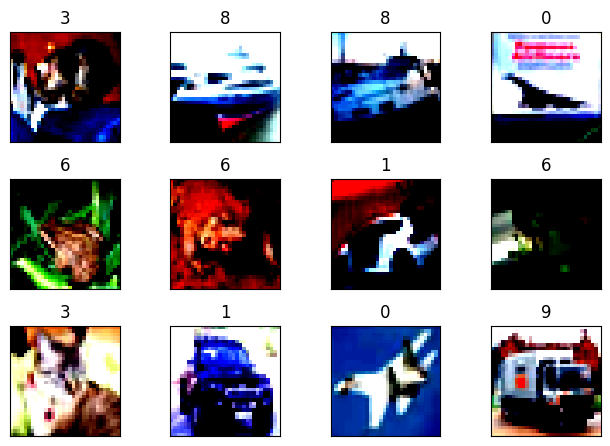

In [40]:
data_path = './data'
batch_size = 512
trainloader,testloader, classes = dataloader(data_path, batch_size)

batch_data, batch_label = next(iter(testloader))
plot_sample_data(testloader)

In [ ]:
model = Net()

In [41]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
model = Net().to(device)

In [42]:
# !pip install torchsummary
from torchsummary import summary
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print(device)
model = Net().to(device)
summary(model, input_size=(3, 32, 32))

cuda
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
              ReLU-2           [-1, 64, 32, 32]               0
       BatchNorm2d-3           [-1, 64, 32, 32]             128
           Dropout-4           [-1, 64, 32, 32]               0
            Conv2d-5          [-1, 128, 32, 32]          73,728
         MaxPool2d-6          [-1, 128, 16, 16]               0
       BatchNorm2d-7          [-1, 128, 16, 16]             256
              ReLU-8          [-1, 128, 16, 16]               0
           Dropout-9          [-1, 128, 16, 16]               0
           Conv2d-10          [-1, 128, 16, 16]         147,456
      BatchNorm2d-11          [-1, 128, 16, 16]             256
             ReLU-12          [-1, 128, 16, 16]               0
          Dropout-13          [-1, 128, 16, 16]               0
           Conv2d-14          [-1,

In [44]:
from lr_finder import get_lr, lr_calc

In [45]:
get_lr(optimizer)

-2.4909183673468838e-05

In [46]:
!pip install torch-lr-finder

  0%|          | 0/200 [00:00<?, ?it/s]

Stopping early, the loss has diverged
Learning rate search finished. See the graph with {finder_name}.plot()
LR suggestion: steepest gradient
Suggested LR: 5.70E-02


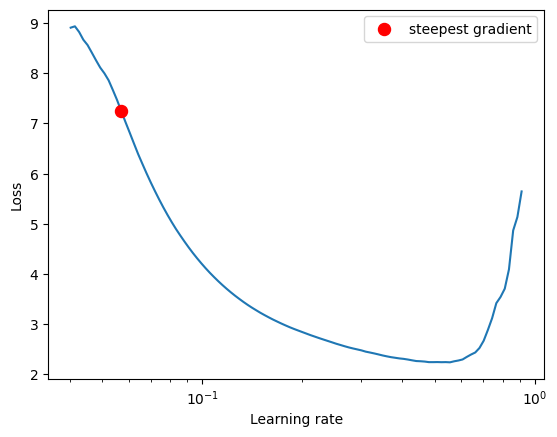

In [47]:
optimizer = optim.Adam(model.parameters(), lr=0.03, weight_decay=1e-4)
criterion = nn.CrossEntropyLoss()

lr_calc(model, train_loader, optimizer, criterion)

In [48]:
from torch.optim.lr_scheduler import OneCycleLR

EPOCHS = 24

scheduler = OneCycleLR(
        optimizer,
        max_lr= 5.70E-02,
        steps_per_epoch=len(train_loader),
        epochs=EPOCHS,
        pct_start=5/EPOCHS,
        div_factor=100,
        three_phase=False,
        final_div_factor=100,
        anneal_strategy='linear'
    )

for epoch in range(EPOCHS):
    print("EPOCH:", epoch)
    train(model, device, train_loader, optimizer, epoch, scheduler, criterion)
    test(model, device, test_loader, criterion)

EPOCH: 0


Loss=1.191328525543213 LR=0.011879079754601226 Batch_id=97 Accuracy=47.29: 100%|██████████| 98/98 [00:31<00:00,  3.16it/s]



Test set: Average loss: 0.0023, Accuracy: 5999/10000 (59.99%)

EPOCH: 1


Loss=1.0365331172943115 LR=0.023188159509202454 Batch_id=97 Accuracy=61.98: 100%|██████████| 98/98 [00:29<00:00,  3.28it/s]



Test set: Average loss: 0.0023, Accuracy: 6131/10000 (61.31%)

EPOCH: 2


Loss=0.7930058240890503 LR=0.03449723926380368 Batch_id=97 Accuracy=68.82: 100%|██████████| 98/98 [00:29<00:00,  3.30it/s]



Test set: Average loss: 0.0018, Accuracy: 7072/10000 (70.72%)

EPOCH: 3


Loss=1.0195040702819824 LR=0.04580631901840491 Batch_id=97 Accuracy=71.87: 100%|██████████| 98/98 [00:29<00:00,  3.27it/s]



Test set: Average loss: 0.0020, Accuracy: 6584/10000 (65.84%)

EPOCH: 4


Loss=0.7912283539772034 LR=0.056969390816326536 Batch_id=97 Accuracy=71.72: 100%|██████████| 98/98 [00:29<00:00,  3.32it/s]



Test set: Average loss: 0.0024, Accuracy: 5995/10000 (59.95%)

EPOCH: 5


Loss=0.8604424595832825 LR=0.053969690816326535 Batch_id=97 Accuracy=71.36: 100%|██████████| 98/98 [00:29<00:00,  3.32it/s]



Test set: Average loss: 0.0016, Accuracy: 7295/10000 (72.95%)

EPOCH: 6


Loss=0.7433291077613831 LR=0.050969990816326534 Batch_id=97 Accuracy=73.12: 100%|██████████| 98/98 [00:29<00:00,  3.30it/s]



Test set: Average loss: 0.0017, Accuracy: 6962/10000 (69.62%)

EPOCH: 7


Loss=0.8044242858886719 LR=0.04797029081632653 Batch_id=97 Accuracy=72.83: 100%|██████████| 98/98 [00:29<00:00,  3.33it/s]



Test set: Average loss: 0.0016, Accuracy: 7235/10000 (72.35%)

EPOCH: 8


Loss=0.7182506322860718 LR=0.04497059081632653 Batch_id=97 Accuracy=74.00: 100%|██████████| 98/98 [00:29<00:00,  3.29it/s]



Test set: Average loss: 0.0018, Accuracy: 6685/10000 (66.85%)

EPOCH: 9


Loss=0.8228924870491028 LR=0.04197089081632653 Batch_id=97 Accuracy=74.32: 100%|██████████| 98/98 [00:29<00:00,  3.34it/s]



Test set: Average loss: 0.0015, Accuracy: 7475/10000 (74.75%)

EPOCH: 10


Loss=0.7247851490974426 LR=0.03897119081632653 Batch_id=97 Accuracy=74.17: 100%|██████████| 98/98 [00:29<00:00,  3.33it/s]



Test set: Average loss: 0.0016, Accuracy: 7189/10000 (71.89%)

EPOCH: 11


Loss=0.8156527280807495 LR=0.03597149081632653 Batch_id=97 Accuracy=75.09: 100%|██████████| 98/98 [00:29<00:00,  3.31it/s]



Test set: Average loss: 0.0015, Accuracy: 7568/10000 (75.68%)

EPOCH: 12


Loss=0.7686973810195923 LR=0.032971790816326535 Batch_id=97 Accuracy=75.18: 100%|██████████| 98/98 [00:29<00:00,  3.31it/s]



Test set: Average loss: 0.0022, Accuracy: 6415/10000 (64.15%)

EPOCH: 13


Loss=0.5896916389465332 LR=0.02997209081632653 Batch_id=97 Accuracy=75.77: 100%|██████████| 98/98 [00:29<00:00,  3.30it/s]



Test set: Average loss: 0.0016, Accuracy: 7318/10000 (73.18%)

EPOCH: 14


Loss=0.6913127899169922 LR=0.02697239081632653 Batch_id=97 Accuracy=76.78: 100%|██████████| 98/98 [00:29<00:00,  3.32it/s]



Test set: Average loss: 0.0013, Accuracy: 7807/10000 (78.07%)

EPOCH: 15


Loss=0.7305291295051575 LR=0.023972690816326532 Batch_id=97 Accuracy=77.29: 100%|██████████| 98/98 [00:29<00:00,  3.34it/s]



Test set: Average loss: 0.0013, Accuracy: 7736/10000 (77.36%)

EPOCH: 16


Loss=0.6390182971954346 LR=0.02097299081632653 Batch_id=97 Accuracy=78.25: 100%|██████████| 98/98 [00:29<00:00,  3.32it/s]



Test set: Average loss: 0.0013, Accuracy: 7846/10000 (78.46%)

EPOCH: 17


Loss=0.6255242824554443 LR=0.017973290816326523 Batch_id=97 Accuracy=78.91: 100%|██████████| 98/98 [00:29<00:00,  3.35it/s]



Test set: Average loss: 0.0011, Accuracy: 8020/10000 (80.20%)

EPOCH: 18


Loss=0.5693626999855042 LR=0.014973590816326529 Batch_id=97 Accuracy=79.80: 100%|██████████| 98/98 [00:29<00:00,  3.32it/s]



Test set: Average loss: 0.0011, Accuracy: 8082/10000 (80.82%)

EPOCH: 19


Loss=0.44085821509361267 LR=0.011973890816326528 Batch_id=97 Accuracy=81.17: 100%|██████████| 98/98 [00:29<00:00,  3.32it/s]



Test set: Average loss: 0.0010, Accuracy: 8356/10000 (83.56%)

EPOCH: 20


Loss=0.4911386966705322 LR=0.008974190816326527 Batch_id=97 Accuracy=82.56: 100%|██████████| 98/98 [00:29<00:00,  3.34it/s]



Test set: Average loss: 0.0009, Accuracy: 8542/10000 (85.42%)

EPOCH: 21


Loss=0.44319289922714233 LR=0.005974490816326526 Batch_id=97 Accuracy=84.19: 100%|██████████| 98/98 [00:29<00:00,  3.30it/s]



Test set: Average loss: 0.0008, Accuracy: 8732/10000 (87.32%)

EPOCH: 22


Loss=0.3939741551876068 LR=0.002974790816326532 Batch_id=97 Accuracy=85.95: 100%|██████████| 98/98 [00:29<00:00,  3.32it/s]



Test set: Average loss: 0.0007, Accuracy: 8886/10000 (88.86%)

EPOCH: 23


Loss=0.3609786331653595 LR=-2.4909183673468838e-05 Batch_id=97 Accuracy=88.15: 100%|██████████| 98/98 [00:29<00:00,  3.33it/s]



Test set: Average loss: 0.0006, Accuracy: 9008/10000 (90.08%)

